In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

In [21]:
driver = webdriver.Chrome(executable_path=r"chromedriver.exe")

<ipython-input-21-a24b71b716e3>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r"chromedriver.exe")


In [3]:
t1 = time.time()


freelancers = {'c1':[], 'c2':[], 'name':[], 'rating':[], 'hourly_rate':[]}
upwork_url = 'https://www.upwork.com'
driver.get(upwork_url)

time.sleep(2)
driver.find_element(By.ID, 'onetrust-accept-btn-handler').click()#Click Accept All Cookies
time.sleep(1)
l = driver.find_elements(By.CLASS_NAME, "category-pill-title")#Find the main categories of work

for index in range(len(l)):#Loop on the main categories of work
    item = l[index]
    col1 = item.text
#    time.sleep(1)
    item.click()
#    time.sleep(2)
    specs = driver.find_elements(By.XPATH, "//a[@class='cat-card w-inline-block']")
    for spec_index in range(len(specs)):# Loop on the sub categories of work
        spec_item = specs[spec_index]
        spec_link = spec_item.get_attribute('href')
        col2 = spec_item.text.split('\n')[0]
        driver.get(spec_link)
#        time.sleep(1)
        workers = driver.find_elements(By.XPATH, "//div[@class='name-link text-center mb-20']")
        for w_idx in range(len(workers)):
            h_rate = driver.find_elements(By.CLASS_NAME, 'fl-hourly-rate')[w_idx].text
            freelancers['c1'].append(col1)
            freelancers['c2'].append(col2)
            freelancers['name'].append(workers[w_idx].text.split('\n')[0])
            freelancers['rating'].append(workers[w_idx].text.split('\n')[2])
            freelancers['hourly_rate'].append(h_rate)
            
        driver.back()
        specs = driver.find_elements(By.XPATH, "//a[@class='cat-card w-inline-block']")
    driver.back()
    l = driver.find_elements(By.CLASS_NAME, "category-pill-title")
    
driver.quit()  
t2 = time.time()
print(t2-t1)

460.92771434783936


In [4]:
import pandas as pd

df = pd.DataFrame(freelancers)

In [5]:
df

,c1,c2,name,rating,hourly_rate
0,Development & IT,Java Developers,Brian L.,5.0/5 (35 jobs),$65/hr
1,Development & IT,Java Developers,Ivan M.,5.0/5 (27 jobs),$35/hr
2,Development & IT,Java Developers,Dmitriy B.,5.0/5 (75 jobs),$45/hr
3,Development & IT,Java Developers,Satya Prakash G.,4.3/5 (16 jobs),$35/hr
4,Development & IT,Java Developers,Yannick G.,5.0/5 (8 jobs),$80/hr
...,...,...,...,...,...
1723,Legal,Regulatory Compliance Specialists,Geeta K.,5.0/5 (8 jobs),$50/hr
1724,Legal,Regulatory Compliance Specialists,Zachary J.,4.7/5 (325 jobs),$200/hr
1725,Legal,Regulatory Compliance Specialists,Muhammad Aamir M.,5.0/5 (25 jobs),$50/hr
1726,Legal,Regulatory Compliance Specialists,Kirsten P.,4.9/5 (15 jobs),$80/hr


In [6]:
df['hourly_rate'] = df.hourly_rate.str[1: -3].astype('int64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   c1           1728 non-null   object
 1   c2           1728 non-null   object
 2   name         1728 non-null   object
 3   rating       1728 non-null   object
 4   hourly_rate  1728 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 67.6+ KB


In [8]:
df.rating.str.split(' ')

0        [5.0/5, (35, jobs)]
1        [5.0/5, (27, jobs)]
2        [5.0/5, (75, jobs)]
3        [4.3/5, (16, jobs)]
4         [5.0/5, (8, jobs)]
                ...         
1723      [5.0/5, (8, jobs)]
1724    [4.7/5, (325, jobs)]
1725     [5.0/5, (25, jobs)]
1726     [4.9/5, (15, jobs)]
1727     [5.0/5, (14, jobs)]
Name: rating, Length: 1728, dtype: object

In [9]:
df['n_jobs'] = df.rating.str.split(' ').str[1].str[1:].str.replace(',', '').astype('int64')

In [10]:
df['rating'] = df.rating.str.split(' ').str[0]

In [11]:
df

,c1,c2,name,rating,hourly_rate,n_jobs
0,Development & IT,Java Developers,Brian L.,5.0/5,65,35
1,Development & IT,Java Developers,Ivan M.,5.0/5,35,27
2,Development & IT,Java Developers,Dmitriy B.,5.0/5,45,75
3,Development & IT,Java Developers,Satya Prakash G.,4.3/5,35,16
4,Development & IT,Java Developers,Yannick G.,5.0/5,80,8
...,...,...,...,...,...,...
1723,Legal,Regulatory Compliance Specialists,Geeta K.,5.0/5,50,8
1724,Legal,Regulatory Compliance Specialists,Zachary J.,4.7/5,200,325
1725,Legal,Regulatory Compliance Specialists,Muhammad Aamir M.,5.0/5,50,25
1726,Legal,Regulatory Compliance Specialists,Kirsten P.,4.9/5,80,15


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   c1           1728 non-null   object
 1   c2           1728 non-null   object
 2   name         1728 non-null   object
 3   rating       1728 non-null   object
 4   hourly_rate  1728 non-null   int64 
 5   n_jobs       1728 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 81.1+ KB


In [13]:
df.n_jobs.describe()

count    1728.000000
mean      104.085069
std       189.808071
min         1.000000
25%        20.000000
50%        51.000000
75%       111.250000
max      3402.000000
Name: n_jobs, dtype: float64

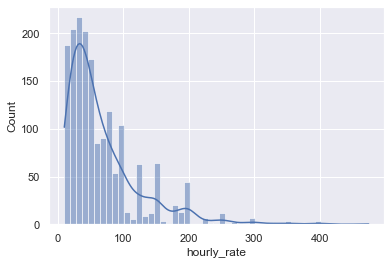

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

sns.histplot(data=df, x='hourly_rate', kde=True)
plt.show()

In [20]:
df.to_csv(r'output/UpWork_freelancers.csv')